In [2]:
from FDFirst import CFDDiscovererWithFD
import pandas as pd

FDs:
Functional Dependencies (FDs) - Total: 20
1. IF petal_length THEN species (conf = 0.9674)
2. IF sepal_length AND sepal_width THEN species (conf = 0.9598)
3. IF sepal_length AND petal_length THEN species (conf = 0.9959)
4. IF sepal_length AND petal_width THEN species (conf = 0.9833)
5. IF sepal_width AND petal_length THEN species (conf = 0.9932)
6. IF sepal_width AND petal_width THEN species (conf = 0.9845)
7. IF petal_length AND petal_width THEN species (conf = 0.9967)
8. IF sepal_length AND sepal_width AND petal_length THEN petal_width (conf = 0.9860)
9. IF sepal_length AND sepal_width AND petal_length THEN species (conf = 1.0000)
10. IF sepal_length AND sepal_width AND petal_width THEN petal_length (conf = 0.9860)
11. IF sepal_length AND sepal_width AND petal_width THEN species (conf = 1.0000)
12. IF sepal_length AND petal_length AND petal_width THEN sepal_width (conf = 0.9860)
13. IF sepal_length AND petal_length AND petal_width THEN species (conf = 1.0000)
14. IF sepal_width A

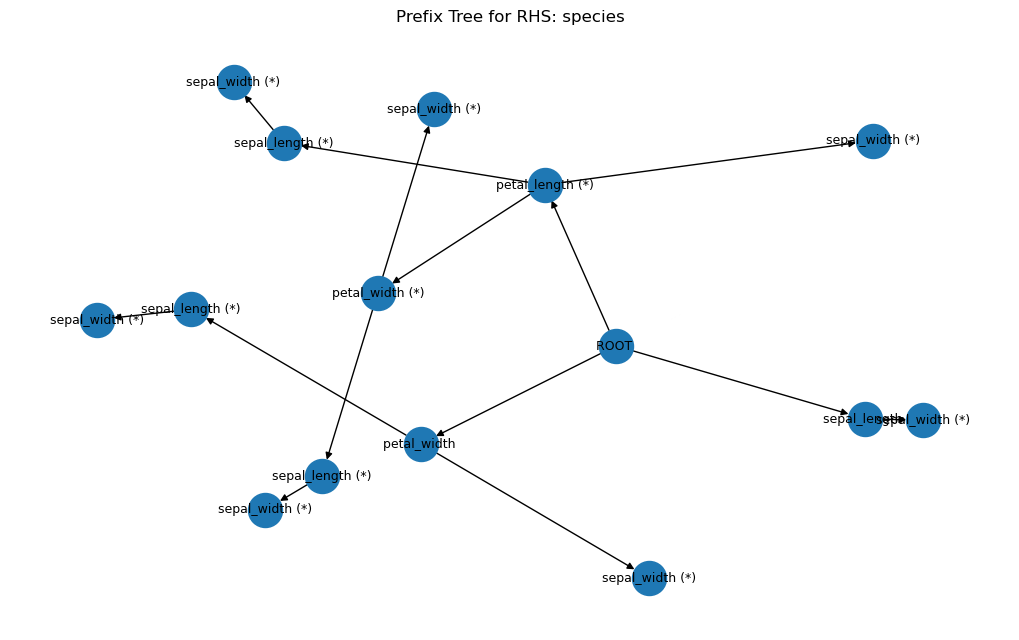

Minimal FDs:
Minimal Functional Dependencies - Total: 8
1. IF petal_length THEN species (conf = 0.9674)
2. IF sepal_length AND sepal_width THEN species (conf = 0.9598)
3. IF sepal_length AND petal_width THEN species (conf = 0.9833)
4. IF sepal_width AND petal_width THEN species (conf = 0.9845)
5. IF sepal_length AND sepal_width AND petal_length THEN petal_width (conf = 0.9860)
6. IF sepal_length AND sepal_width AND petal_width THEN petal_length (conf = 0.9860)
7. IF sepal_length AND petal_length AND petal_width THEN sepal_width (conf = 0.9860)
8. IF sepal_width AND petal_length AND petal_width THEN sepal_length (conf = 0.9824)


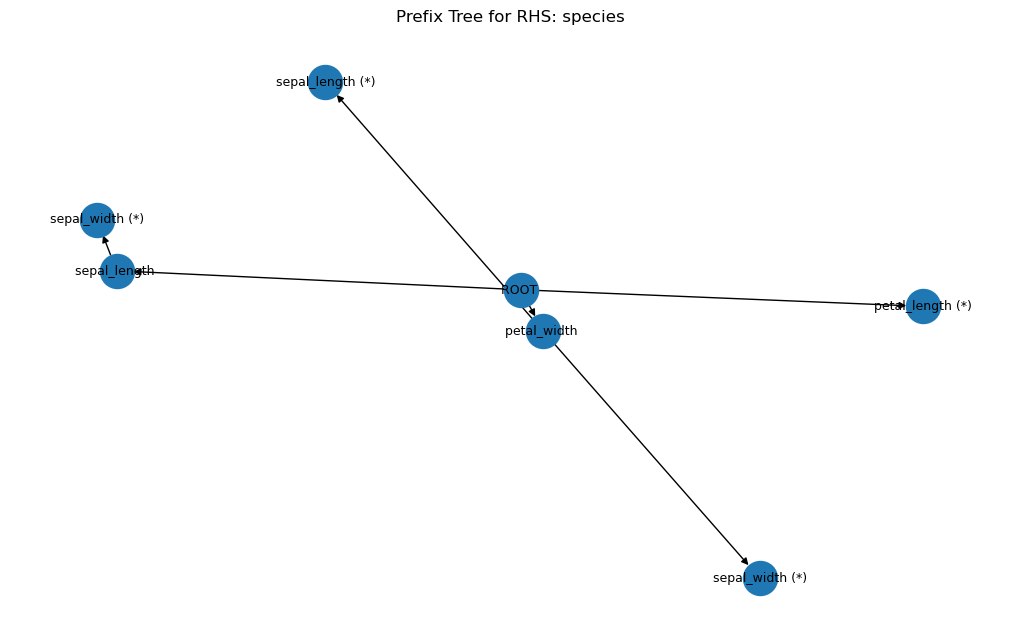

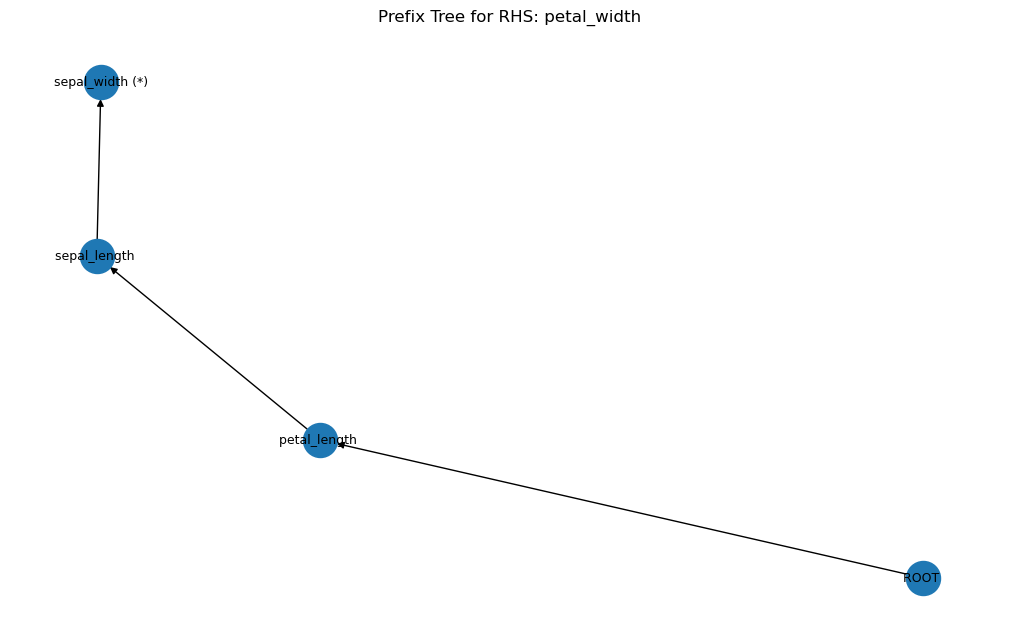

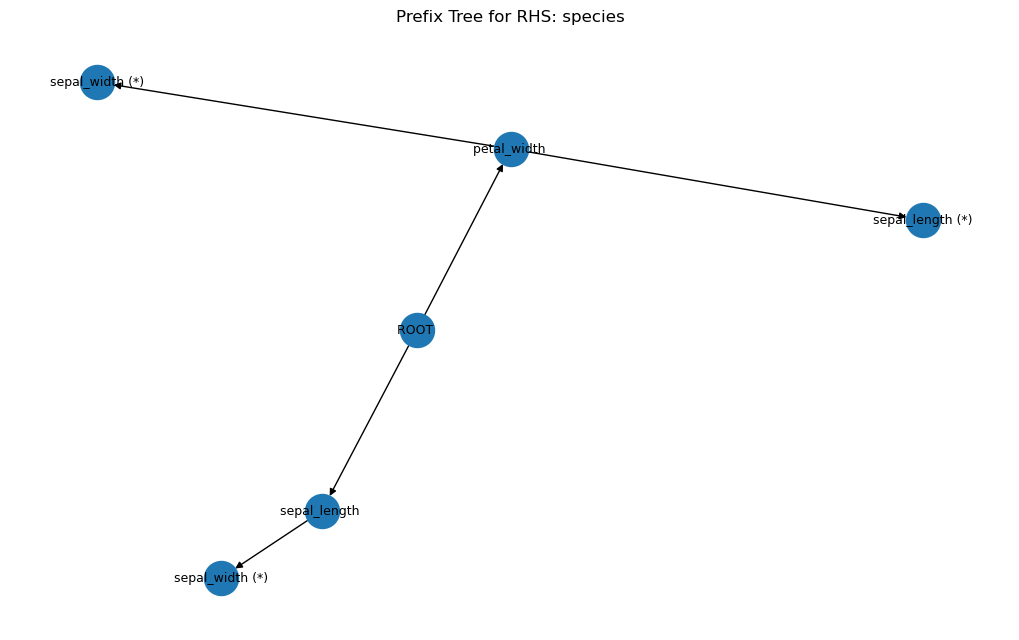

Top CFD Rules:
Constant CFDs - Total: 11
1. IF petal_length=1.5 THEN species (conf = 1.0000, supp = 14)
2. IF petal_length=1.4 THEN species (conf = 1.0000, supp = 12)
3. IF petal_length=1.3 THEN species (conf = 1.0000, supp = 7)
4. IF petal_length=1.6 THEN species (conf = 1.0000, supp = 7)
5. IF petal_length=5.6 THEN species (conf = 1.0000, supp = 6)
6. IF sepal_width=3.4 AND petal_width=0.2 THEN species (conf = 1.0000, supp = 6)
7. IF petal_length=4.0 THEN species (conf = 1.0000, supp = 5)
8. IF petal_length=4.7 THEN species (conf = 1.0000, supp = 5)
9. IF sepal_length=5.0 AND petal_width=0.2 THEN species (conf = 1.0000, supp = 5)
10. IF sepal_width=2.9 AND petal_width=1.3 THEN species (conf = 1.0000, supp = 5)
11. IF sepal_width=3.2 AND petal_width=0.2 THEN species (conf = 1.0000, supp = 5)
CFD Log: {'type': 'CFD', 'rule_count': 11, 'min_support': 5, 'min_confidence': 0.95, 'time_sec': 0.238, 'memory_peak_mb': 0.27}
Top Variable CFD Rules:
Variable CFDs - Total: 19
1. IF petal_length

In [8]:
# 示例：用 Iris 数据集测试
df = pd.read_csv("DataSet/iris.csv", header=None)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

discoverer = CFDDiscovererWithFD(df, maxsize=4, minconf=0.95, n_bins=None, conf_method="avg")

print("FDs:")
discoverer.get_top_fds(topk=30)

discoverer.visualize_fd_candidates("species")

print("Minimal FDs:")
discoverer.get_top_minimal_fds(topk=30, direct=True)

discoverer.repo.visualize_rhs_tree("species")
discoverer.repo.visualize_rhs_tree("petal_width")
# 手动删除某条规则（例如 ("petal_length", "petal_width") → "species"）
discoverer.repo.delete(("petal_length",), "species")
# 再次可视化
discoverer.repo.visualize_rhs_tree("species")

print("Top CFD Rules:")
discoverer.discover_cfds(min_support=5)
discoverer.get_top_cfds(topk=20)

cfds_info, cfd_log = discoverer.discover_cfds_tracked(min_support=5)
print("CFD Log:", {**cfds_info, **cfd_log})

print("Top Variable CFD Rules:")
discoverer.discover_variable_cfds(min_support=5)
discoverer.get_top_variable_cfds(topk=20)

vcfds_info, vcfd_log = discoverer.discover_variable_cfds_tracked(min_support=5)
print("vCFD Log:", {**vcfds_info, **vcfd_log})

violation_rows = discoverer.detect_cfd_violations(topk=20)

print(f"共发现 {len(violation_rows)} 条违反规则的记录，显示前10条：\n")

repaired_df = discoverer.repair_errors(topk=20)

for idx in violation_rows[:10]:  # ✅ 限制输出前10条
    print("Before:", discoverer.processed_df.iloc[idx].to_dict())
    print("After: ", repaired_df.iloc[idx].to_dict())
    print("------")

In [18]:
# 示例：用 Iris 数据集测试
df = pd.read_csv("DataSet/nursery.csv", header=None)
df.columns = [
    'parents', 'has_nurs', 'form', 'children', 'housing',
    'finance', 'social', 'health', 'recommend'
]

discoverer = CFDDiscovererWithFD(df, maxsize=10, minconf=0.9, n_bins=None, conf_method="overall")

print("FDs:")
discoverer.get_top_fds(topk=30)

print("Minimal FDs:")
discoverer.get_top_minimal_fds(topk=30)

print("Top CFD Rules:")
discoverer.discover_cfds(min_support=10)
discoverer.get_top_cfds(topk=20)

cfds_info, cfd_log = discoverer.discover_cfds_tracked(min_support=10)
print("CFD Log:", {**cfds_info, **cfd_log})

print("Top Variable CFD Rules:")
discoverer.discover_variable_cfds(min_support=10)
discoverer.get_top_variable_cfds(topk=20)

vcfds_info, vcfd_log = discoverer.discover_variable_cfds_tracked(min_support=10)
print("vCFD Log:", {**vcfds_info, **vcfd_log})

violation_rows = discoverer.detect_cfd_violations(topk=20)

print(f"共发现 {len(violation_rows)} 条违反规则的记录，显示前10条：\n")

repaired_df = discoverer.repair_errors(topk=20)

for idx in violation_rows[:10]:  # ✅ 限制输出前10条
    print("Before:", discoverer.processed_df.iloc[idx].to_dict())
    print("After: ", repaired_df.iloc[idx].to_dict())
    print("------")

FDs:
Functional Dependencies (FDs) - Total: 26
1. IF parents AND has_nurs AND housing AND health THEN recommend (conf = 0.9014)
2. IF parents AND has_nurs AND social AND health THEN recommend (conf = 0.9014)
3. IF parents AND has_nurs AND form AND children AND health THEN recommend (conf = 0.9110)
4. IF parents AND has_nurs AND form AND housing AND health THEN recommend (conf = 0.9023)
5. IF parents AND has_nurs AND form AND social AND health THEN recommend (conf = 0.9014)
6. IF parents AND has_nurs AND children AND housing AND health THEN recommend (conf = 0.9093)
7. IF parents AND has_nurs AND children AND social AND health THEN recommend (conf = 0.9188)
8. IF parents AND has_nurs AND housing AND finance AND health THEN recommend (conf = 0.9213)
9. IF parents AND has_nurs AND housing AND social AND health THEN recommend (conf = 0.9306)
10. IF parents AND has_nurs AND finance AND social AND health THEN recommend (conf = 0.9014)
11. IF parents AND has_nurs AND form AND children AND hou

In [7]:
# 示例：用 Iris 数据集测试
df = pd.read_csv("DataSet/adult.csv")
print(df.head())

discoverer = CFDDiscovererWithFD(df, maxsize=10, minconf=0.95, n_bins=None)
print("FDs:")
discoverer.get_top_fds(topk=30)

print("Minimal FDs:")
discoverer.get_top_minimal_fds(topk=30, direct=True)

print("Top CFD Rules:")
discoverer.discover_cfds(min_support=30)
discoverer.get_top_cfds(topk=20)

cfds_info, cfd_log = discoverer.discover_cfds_tracked(min_support=30)
print("CFD Log:", {**cfds_info, **cfd_log})

print("Top Variable CFD Rules:")
discoverer.discover_variable_cfds(min_support=30)
discoverer.get_top_variable_cfds(topk=20)

vcfds_info, vcfd_log = discoverer.discover_variable_cfds_tracked(min_support=30)
print("vCFD Log:", {**vcfds_info, **vcfd_log})

violation_rows = discoverer.detect_cfd_violations(topk=20)

print(f"共发现 {len(violation_rows)} 条违反规则的记录，显示前10条：\n")

repaired_df = discoverer.repair_errors(topk=20)

for idx in violation_rows[:10]:  # ✅ 限制输出前10条
    print("Before:", discoverer.processed_df.iloc[idx].to_dict())
    print("After: ", repaired_df.iloc[idx].to_dict())
    print("------")

   Age Workclass Education Marital-status         Occupation   Relationship  \
0  <18   Private      10th  Never-married  Machine-op-inspct  Not-in-family   
1  <18         ?      10th  Never-married                  ?      Own-child   
2  <18   Private      11th  Never-married              Sales      Own-child   
3  <18   Private      10th  Never-married              Sales      Own-child   
4  <18         ?      11th  Never-married                  ?      Own-child   

    Race     Sex HoursPerWeek        Country       Income  
0  White    Male           40  United-States  LessThan50K  
1  White    Male           40  United-States  LessThan50K  
2  White  Female           25  United-States  LessThan50K  
3  White  Female        18-21  United-States  LessThan50K  
4  White    Male           40  United-States  LessThan50K  
FDs:


KeyboardInterrupt: 

In [ ]:
# 示例：用 Iris 数据集测试
df = pd.read_csv("DataSet/mushroom.csv")
print(df.head())

discoverer = CFDDiscovererWithFD(df, maxsize=10, minconf=0.95, n_bins=None)

print("Top CFD Rules:")
discoverer.discover_cfds(min_support=30)
discoverer.get_top_cfds(topk=20)

cfds_info, cfd_log = discoverer.discover_cfds_tracked(min_support=30)
print("CFD Log:", {**cfds_info, **cfd_log})

print("Top Variable CFD Rules:")
discoverer.discover_variable_cfds(min_support=30)
discoverer.get_top_variable_cfds(topk=20)

vcfds_info, vcfd_log = discoverer.discover_variable_cfds_tracked(min_support=30)
print("vCFD Log:", {**vcfds_info, **vcfd_log})

  edible cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      p         x           s         n       t    p               f   
1      e         x           s         y       t    a               f   
2      e         b           s         w       t    l               f   
3      p         x           y         w       t    p               f   
4      e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1 

In [16]:
# 示例：用 Iris 数据集测试
df = pd.read_csv("DataSet/contraceptive.csv")
print(df.head())

discoverer = CFDDiscovererWithFD(df, maxsize=10, minconf=0.95, n_bins=None)

print("FDs:")
discoverer.get_top_fds(topk=30)

print("Minimal FDs:")
discoverer.get_top_minimal_fds(topk=30, direct=True)

print("Top CFD Rules:")
discoverer.discover_cfds(min_support=10)
discoverer.get_top_cfds(topk=20)

cfds_info, cfd_log = discoverer.discover_cfds_tracked(min_support=10)
print("CFD Log:", {**cfds_info, **cfd_log})

print("Top Variable CFD Rules:")
discoverer.discover_variable_cfds(min_support=10)
discoverer.get_top_variable_cfds(topk=20)

vcfds_info, vcfd_log = discoverer.discover_variable_cfds_tracked(min_support=10)
print("vCFD Log:", {**vcfds_info, **vcfd_log})

violation_rows = discoverer.detect_cfd_violations(topk=20)

print(f"共发现 {len(violation_rows)} 条违反规则的记录，显示前10条：\n")

repaired_df = discoverer.repair_errors(topk=20)

for idx in violation_rows[:10]:  # ✅ 限制输出前10条
    print("Before:", discoverer.processed_df.iloc[idx].to_dict())
    print("After: ", repaired_df.iloc[idx].to_dict())
    print("------")

   WifeAge  WifeEdu  HusbEdu  NrChildren  WifeReligion  WifeWorking  \
0       24        2        3           3             1            1   
1       45        1        3          10             1            1   
2       43        2        3           7             1            1   
3       42        3        2           9             1            1   
4       36        3        3           8             1            1   

   HusbandOccup  SOLIndex  MediaExp  Contraceptive  
0             2         3         0              1  
1             3         4         0              1  
2             3         4         0              1  
3             3         3         0              1  
4             3         2         0              1  
FDs:
Functional Dependencies (FDs) - Total: 397
1. IF WifeAge AND WifeEdu AND HusbEdu THEN MediaExp (conf = 0.9518)
2. IF WifeAge AND WifeEdu AND NrChildren THEN MediaExp (conf = 0.9674)
3. IF WifeAge AND WifeEdu AND SOLIndex THEN MediaExp (conf = 0.9552)

In [16]:
# 示例：用 Iris 数据集测试
df = pd.read_csv("DataSet/balance-scale.csv")
df.columns=["Class_Name", "Left_Weight", "Left_Distance", "Right_Weight", "Right_Distance"]
print(df.head())

discoverer = CFDDiscovererWithFD(df, maxsize=10, minconf=0.95, n_bins=None, conf_method="avg")

print("FDs:")
discoverer.get_top_fds(topk=30)

print("Minimal FDs:")
discoverer.get_top_minimal_fds(topk=30, direct=True)

print("Top CFD Rules:")
discoverer.discover_cfds(min_support=5)
discoverer.get_top_cfds(topk=20)

cfds_info, cfd_log = discoverer.discover_cfds_tracked(min_support=5)
print("CFD Log:", {**cfds_info, **cfd_log})

print("Top Variable CFD Rules:")
discoverer.discover_variable_cfds(min_support=5)
discoverer.get_top_variable_cfds(topk=20)

vcfds_info, vcfd_log = discoverer.discover_variable_cfds_tracked(min_support=5)
print("vCFD Log:", {**vcfds_info, **vcfd_log})

violation_rows = discoverer.detect_cfd_violations(topk=20)

print(f"共发现 {len(violation_rows)} 条违反规则的记录，显示前10条：\n")

repaired_df = discoverer.repair_errors(topk=20)

for idx in violation_rows[:10]:  # ✅ 限制输出前10条
    print("Before:", discoverer.processed_df.iloc[idx].to_dict())
    print("After: ", repaired_df.iloc[idx].to_dict())
    print("------")

  Class_Name  Left_Weight  Left_Distance  Right_Weight  Right_Distance
0          R            1              1             1               2
1          R            1              1             1               3
2          R            1              1             1               4
3          R            1              1             1               5
4          R            1              1             2               1
FDs:
Functional Dependencies (FDs) - Total: 1
1. IF Left_Weight AND Left_Distance AND Right_Weight AND Right_Distance THEN Class_Name (conf = 1.0000)
Minimal FDs:
Minimal Functional Dependencies - Total: 1
1. IF Left_Weight AND Left_Distance AND Right_Weight AND Right_Distance THEN Class_Name (conf = 1.0000)
Top CFD Rules:
Constant CFDs - Total: 0
CFD Log: {'type': 'CFD', 'rule_count': 0, 'min_support': 5, 'min_confidence': 0.95, 'time_sec': 0.132, 'memory_peak_mb': 0.5}
Top Variable CFD Rules:
Variable CFDs - Total: 0
vCFD Log: {'type': 'vCFD', 'rule_count': 0, 'min_

In [3]:
import pandas as pd

# 文件路径
file_paths = {
    "contraceptive": "DataSet/contraceptive.csv",
    "adult": "DataSet/adult.csv",
    "abalone": "DataSet/abalone.csv"
}

feature_logs = {}

# 读取并分析数据集
for name, path in file_paths.items():
    df = pd.read_csv(path, na_values=["?"])  # ✅ 识别 "?" 为缺失值

    log = {
        "dataset": name,
        "num_rows": df.shape[0],
        "num_columns": df.shape[1],
        "column_names": df.columns.tolist(),
        "num_missing": df.isnull().sum().sum(),
        "missing_per_column": df.isnull().sum().to_dict(),
        "num_unique_per_column": df.nunique().to_dict(),
        "data_types": df.dtypes.astype(str).to_dict()
    }

    feature_logs[name] = log

# 汇总日志为表格
summary = []
for ds, log in feature_logs.items():
    summary.append({
        "Dataset": ds,
        "Rows": log["num_rows"],
        "Columns": log["num_columns"],
        "Missing_Values": log["num_missing"],
        "Cols_with_Missing": sum(1 for v in log["missing_per_column"].values() if v > 0),
        "Categorical_Cols": sum(1 for v in log["data_types"].values() if v == 'object'),
        "Numerical_Cols": sum(1 for v in log["data_types"].values() if v != 'object'),
    })

summary_df = pd.DataFrame(summary)

# ✅ 不换行打印 DataFrame
with pd.option_context('display.max_columns', None, 'display.expand_frame_repr', False):
    print(summary_df)

         Dataset   Rows  Columns  Missing_Values  Cols_with_Missing  Categorical_Cols  Numerical_Cols
0  contraceptive   1473       10               0                  0                 0              10
1          adult  48842       11            6465                  3                11               0
2        abalone   4177        9               0                  0                 1               8
